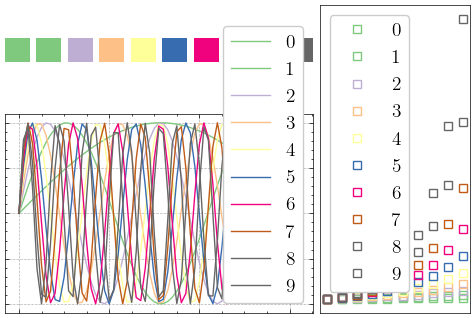

In [3]:
import tools.file as tf
import numpy as np
import drawwithplt as Dplt
from drawwithplt import plt
import model.global_Value as G
Dplt.plt.style.use(["science","grid"])

colorlist = Dplt.SetColor("Accent", np.linspace(0,1,10))

In [7]:
def plot_sa_data(temp_data_list):
    # 提取数据
    temperatures = [data['temperature'] for data in temp_data_list]
    Hqs = [data['current_h_list']['Hq'] for data in temp_data_list]
    Hds = [data['current_h_list']['Hd'] for data in temp_data_list]
    Hws = [data['current_h_list']['Hw'] for data in temp_data_list]
    total_Hs = [data['current_energy'] for data in temp_data_list]
    temperatures = [1/i for i in temperatures]

    # 计算每种能量占总能量的百分比
    Hq_percentage = [100 * Hq / total_H for Hq, total_H in zip(Hqs, total_Hs)]
    Hd_percentage = [100 * Hd / total_H for Hd, total_H in zip(Hds, total_Hs)]
    Hw_percentage = [100 * Hw / total_H for Hw, total_H in zip(Hws, total_Hs)]

    # 设置图形
    fig, ax1 = Dplt.SetSubFig(1,1,(5,3))

    # 左纵轴绘制总能量，并使用对数坐标
    ax1.set_xlabel('$1/T$')
    ax1.set_ylabel('$H$', color='black')
    ax1.plot(temperatures, total_Hs, '-', color='black', label="$H$")
    # ax1.set_ylim(2000,50000)
    ax1.set_xscale('log')
    # ax1.set_yscale('log')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(linestyle=":", color='black', alpha=0.4)

    # 创建与ax1共享x轴的第二个坐标系
    ax2 = ax1.twinx()

    # 右纵轴绘制能量百分比
    alpha = 0.8
    ax2.set_ylabel('Energy Percentage', color=colorlist[0])
    ax2.plot(temperatures, Hq_percentage, ':', label=r"$H_{\text{q}}$", alpha=alpha)
    ax2.plot(temperatures, Hd_percentage, ':', label=r"$H_{\text{d}}$", alpha=alpha)
    ax2.plot(temperatures, Hw_percentage, ':', label=r"$H_{\text{w}}$", alpha=alpha)
    ax2.tick_params(axis='y', labelcolor=colorlist[0])
    ax2.grid(linestyle="--", color=colorlist[0], alpha=0.4)
    
    # 总能量的图例放在左上角，其余放在图的外部
    ax1.legend(loc='lower left', framealpha=0.5)
    ax2.legend(loc='center right', framealpha=0.5)

    Dplt.plt.tight_layout()  # 确保图例和标签不会重叠

def plot_sb_data(sb_data_list):
    # 提取数据
    iterations = [data['iteration'] for data in sb_data_list]
    Hqs = [data['current_h_list']['Hq'] for data in sb_data_list]
    Hds = [data['current_h_list']['Hd'] for data in sb_data_list]
    Hws = [data['current_h_list']['Hw'] for data in sb_data_list]
    total_Hs = [data['current_energy'] for data in sb_data_list]

    # 计算每种能量占总能量的百分比
    Hq_percentage = [100 * Hq / total_H for Hq, total_H in zip(Hqs, total_Hs)]
    Hd_percentage = [100 * Hd / total_H for Hd, total_H in zip(Hds, total_Hs)]
    Hw_percentage = [100 * Hw / total_H for Hw, total_H in zip(Hws, total_Hs)]

    # 设置图形
    fig, ax1 = Dplt.SetSubFig(1, 1, (5, 3))

    # 左纵轴绘制总能量
    ax1.set_xlabel('$Iter$')
    ax1.set_ylabel('$H$', color='black')
    ax1.plot(iterations, total_Hs, '-', color='black', label="$H$")
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(linestyle=":", color='black', alpha=0.4)

    # 创建与ax1共享x轴的第二个坐标系
    ax2 = ax1.twinx()

    # 右纵轴绘制能量百分比
    alpha = 0.8
    ax2.set_ylabel('Energy Percentage', color=colorlist[0])
    ax2.plot(iterations, Hq_percentage, ':', label=r"$H_{\text{q}}$", alpha=alpha)
    ax2.plot(iterations, Hd_percentage, ':', label=r"$H_{\text{d}}$", alpha=alpha)
    ax2.plot(iterations, Hw_percentage, ':', label=r"$H_{\text{w}}$", alpha=alpha)
    ax2.tick_params(axis='y', labelcolor=colorlist[0])
    ax2.grid(linestyle="--", color=colorlist[0], alpha=0.4)
    
    
    # 总能量的图例放在左上角，其余放在图的外部
    ax1.legend(loc='lower left', framealpha=0.5)
    ax2.legend(loc='center right', framealpha=0.5)

    Dplt.plt.tight_layout()  # 确保图例和标签不会重叠


In [5]:
def plot_matrices(matrix1, matrix2):
    fig, ax = Dplt.plt.subplots(1, 2, figsize=(5, 3))
    
    # Plot matrix 1
    ax[0].imshow(matrix1, cmap='gray')
    ax[0].set_title('Matrix 1')
    ax[0].axis('off')
    
    # Plot matrix 2
    ax[1].imshow(matrix2, cmap='gray')
    ax[1].set_title('Matrix 2')
    ax[1].axis('off')

In [6]:
import numpy as np

def plot_benchmark(GN_values, timeSAlist, timeSBlist):
    # 使用GN_values作为x轴的数据
    x = GN_values

    # 计算均值、最大值和最小值
    meanSA = np.mean(timeSAlist, axis=0)
    maxSA = np.max(timeSAlist, axis=0)
    minSA = np.min(timeSAlist, axis=0)

    meanSB = np.mean(timeSBlist, axis=0)
    maxSB = np.max(timeSBlist, axis=0)
    minSB = np.min(timeSBlist, axis=0)

    # 过滤掉均值为-1的列
    valid_indices_SA = meanSA != -1
    valid_indices_SB = meanSB != -1

    # 拟合t=a*N^b
    coeffSA = np.polyfit(np.log(x[valid_indices_SA]), np.log(meanSA[valid_indices_SA]), 1)
    coeffSB = np.polyfit(np.log(x[valid_indices_SB]), np.log(meanSB[valid_indices_SB]), 1)
    extended_x = np.logspace(np.log10(min(x)), np.log10(max(x)), 400)  # 扩展x范围
    fitSA = np.exp(coeffSA[1]) * extended_x**coeffSA[0]
    fitSB = np.exp(coeffSB[1]) * extended_x**coeffSB[0]

    # 绘制图形
    fig, ax = plt.subplots(figsize=(2.5, 3.5))
    ax.plot(extended_x, fitSA, 'b--', label=r'Fit: $~N^{%.2f}$' % coeffSA[0])
    ax.plot(extended_x, fitSB, 'r--', label=r'Fit: $~N^{%.2f}$' % coeffSB[0])

    # 绘制有有效均值的点
    ax.errorbar(x[valid_indices_SA], meanSA[valid_indices_SA], yerr=[meanSA[valid_indices_SA]-minSA[valid_indices_SA], maxSA[valid_indices_SA]-meanSA[valid_indices_SA]], fmt='.', capsize=5, label='SA', color='blue')
    ax.errorbar(x[valid_indices_SB], meanSB[valid_indices_SB], yerr=[meanSB[valid_indices_SB]-minSB[valid_indices_SB], maxSB[valid_indices_SB]-meanSB[valid_indices_SB]], fmt='.', capsize=5, label='SB', color='red')

    # 设置对数坐标轴和图例、标题、坐标轴标签
    ax.set_xscale('log')
    ax.set_yscale('log')

    # 设置y轴范围，并在整十的次方处标注刻度
    ax.set_ylim(0.005, 5000)
    ax.set_yticks([0.01, 0.1, 1, 10, 100, 1000])
    ax.set_yticklabels(["$10^{%d}$" % np.log10(i) for i in [0.01, 0.1, 1, 10, 100, 1000]])

    # 设置x轴范围，同样在整10的次方处标注刻度
    ax.set_xlim(min(x), max(x))
    ax.set_xticks([10**i for i in range(int(np.log10(min(x))), int(np.log10(max(x))) + 1)])
    ax.set_xticklabels(["$10^{%d}$" % i for i in range(int(np.log10(min(x))), int(np.log10(max(x))) + 1)])

    ax.legend(fontsize=10)
    ax.set_xlabel('N')
    ax.set_ylabel('Time (s)')



In [7]:
from drawwithplt import plt

def plot_combined_data(eta_data_list):
    fig, axs = plt.subplots(len(eta_data_list), 1, figsize=(3, 1.5 * len(eta_data_list)), sharex=True)

    eta_ex = -3

    # 如果只有一组数据，确保axs是一个列表
    if len(eta_data_list) == 1:
        axs = [axs]

    for idx, data_list in enumerate(eta_data_list):
        # 提取SA的数据
        sa_data = data_list[0]
        sa_temperatures = [1 / data['temperature'] for data in sa_data]
        sa_total_Hs = [data['current_energy'] for data in sa_data]

        # 提取SB的数据
        sb_data = data_list[1]
        sb_iterations = [data['iteration'] for data in sb_data]
        sb_total_Hs = [data['current_energy'] for data in sb_data]

        # 绘制SA数据
        axs[idx].plot(sa_temperatures, sa_total_Hs, '-.', label="SA Total H")
        axs[idx].set_xscale('log')
        
        axs[idx].xaxis.grid(False)  # 隐藏x轴的网格线
        axs[idx].yaxis.grid(which='both', linestyle='--')

        if idx == len(eta_data_list) - 1:
            axs[idx].set_xlabel('1/Temperature for SA')
        axs[idx].set_ylabel('$H$ ($\eta=10^{%d}$)'%eta_ex, rotation=90, labelpad=5, y=0.5)
        
        # 绘制SB数据
        ax2 = axs[idx].twiny()
        ax2.plot(sb_iterations, sb_total_Hs, '--', label="SB Total H")
        ax2.set_xscale('log')
        ax2.xaxis.grid(False)  # 隐藏x轴的网格线
        ax2.set_xticks([10**0, 10**1, 10**2, 10**3])  # 设置x轴刻度为 10^0, 10^1, 10^2, 10^3
        
        if idx == 0:
            ax2.set_xlabel('Iteration for SB')
        
        # 只有顶部子图显示上方的横轴
        ax2.xaxis.set_visible(idx == 0)
        
        axs[idx].tick_params(axis='x', which='both', pad=6)  # 调整SA数据的x轴刻度距离
        ax2.tick_params(axis='x', which='both', pad=1)       # 调整SB数据的x轴刻度距离

        handles, labels = axs[idx].get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        axs[idx].legend(handles + handles2, labels + labels2, loc='upper right', framealpha=0.5)

        eta_ex += 2

    # 设置子图间的纵间距为0
    plt.subplots_adjust(hspace=0)
    plt.tight_layout(pad=0)

def GetEnergyList():
    datalist = []
    for eta_ex in range(-3,4,2):
        tmpdataSA = tf.Load_data("Result/EnergyReview/test_result_SA_eta(10)%d.pkl"%eta_ex)
        tmpdataSB = tf.Load_data("Result/EnergyReview/test_result_SB_eta(10)%d.pkl"%eta_ex)
        datalist.append([tmpdataSA,tmpdataSB])
    return datalist


# 绘制数据

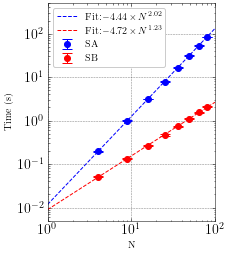

In [29]:
data = tf.Load_data("Result/Benchmark/test_time.pkl")
plot_benchmark(data[0], data[1])
Dplt.SaveFig(1,"Benchmark.png","Figure/")

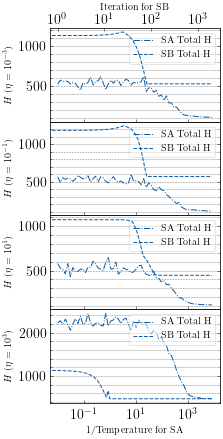

In [32]:
plot_combined_data(eta_data_list=GetEnergyList())
Dplt.SaveFig(1,"Energy_eta.png","Figure/")

c:\Users\79323\.conda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:44: UserWarning: AutoMinorLocator does not work with logarithmic scale


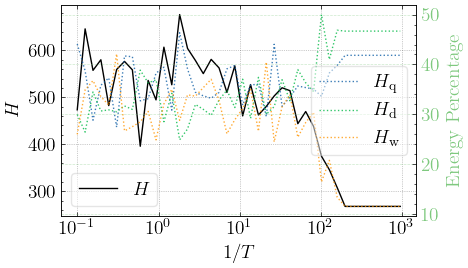

In [8]:
# 使用方法
data = tf.Load_data("Result/SA/test_result.pkl")
plot_sa_data(data)
Dplt.SaveFig(1,"minH.png","Figure/TestSA/")

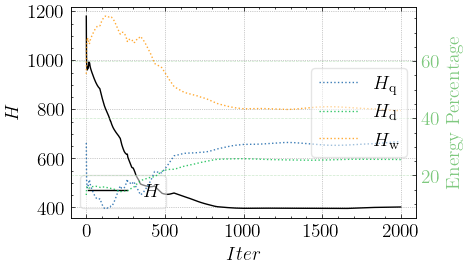

In [9]:
data = tf.Load_data("Result/SB/test_result.pkl")
plot_sb_data(data)
Dplt.SaveFig(1,"minH.png","Figure/TestSB/")

In [26]:
data = tf.Load_data("Result/SB/test_result_X.pkl")
plot_matrices(data[0], data[1])

In [82]:
data[0][:,9]

array([-1., -1., -1., -1.])

In [79]:
data[0]-data[1]

array([[ 0., -2.,  0., ...,  0., -2.,  0.],
       [-2., -2., -2., ...,  0.,  0., -2.],
       [ 0., -2.,  0., ...,  0.,  0.,  0.],
       [-2., -2.,  0., ...,  0., -2., -2.]])

## 处理并可视化路网数据

In [12]:
import model.traffic as gv
adjacency_matrix, intersection_dict = gv.InitializeRoadNetwork_ForFigure()

No close intersection found for point (489836.0878875526, 301984.2024015736), closest distance: 540.6062100734734
Failed to find intersections for road between (489836.0878875526, 301984.2024015736) and (490339.8770638752, 302201.24795902625)
No close intersection found for point (489950.15625, 304935.1875), closest distance: 339.0993130275523
Failed to find intersections for road between (490253.3574227325, 305087.0341099371) and (489950.15625, 304935.1875)
No close intersection found for point (489644.23996, 302480.61282), closest distance: 407.2768060832241
Failed to find intersections for road between (489644.23996, 302480.61282) and (490051.51635, 302480.03065)
No close intersection found for point (489950.15625, 304935.1875), closest distance: 339.0993130275523
Failed to find intersections for road between (489950.15625, 304935.1875) and (490253.3574227325, 305087.0341099371)
No close intersection found for point (489644.23996, 302480.61282), closest distance: 407.2768060832241
F

In [13]:
statedata = tf.Load_data("Y:/2023-Traffic/Result/TestTimeList/SA_time_step_0.pkl")

In [14]:
tf.Load_data("Y:/2023-Traffic/Result/TestTimeList/SB_time_step_0.pkl").shape

(4, 378)

In [15]:
def decimal_to_allowed_state(decimal_number):
    # Convert the decimal number to a binary string, removing the '0b' prefix
    binary_str = bin(decimal_number)[2:]
    # Ensure the binary string is 4 digits long by padding with zeros on the left
    binary_str = binary_str.zfill(4)
    # Convert the binary string to a list of -1 and 1, with -1 for '0' and 1 for '1'
    # The conversion should account for the order (0 index is the least significant bit)
    state_list = [1 if digit == '1' else -1 for digit in reversed(binary_str)]
    return state_list

def allowed_state_to_decimal(state_list):
    # Convert the list of -1 and 1 back to a binary string
    # The conversion should account for the order (0 index is the least significant bit)
    binary_str = ''.join(['1' if num == 1 else '0' for num in reversed(state_list)])
    # Convert the binary string to a decimal number
    decimal_number = int(binary_str, 2)
    return decimal_number

In [16]:
from scipy.sparse import csr_matrix

def decimal_to_binary_string(decimal):
    # Handle negative values by converting them to zero for the binary representation
    if decimal < 0:
        return '0'
    else:
        return str(decimal)

def visualize_simplified_network(intersection_dict, adjacency_matrix, state_dict, allowed_states):
    # Define a color map for the allowed states
    color_map = plt.cm.get_cmap('Accent', len(allowed_states))
    
    # Determine the binary representation of the allowed states
    allowed_states_binary = [''.join('0' if x == -1 else '1' for x in state)[::-1] for state in allowed_states]
    allowed_states_decimal = [int(state, 2) for state in allowed_states_binary]
    print(allowed_states_decimal)

    # Default color for states not allowed
    default_color = 'black'
    
    fig, ax = plt.subplots()

    # Ensure adjacency_matrix is a CSR matrix to use .tocoo()
    if not isinstance(adjacency_matrix, csr_matrix):
        adjacency_matrix = csr_matrix(adjacency_matrix)

    # Plot the edges using adjacency_matrix
    coo_matrix = adjacency_matrix.tocoo()
    for start, end in zip(coo_matrix.row, coo_matrix.col):
        if start != end:  # This ensures no self-loop is considered
            point1 = intersection_dict[start]
            point2 = intersection_dict[end]
            ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k-', lw=0.5)
    
    # Plot the intersections using intersection_dict and color them based on their state
    for idx, point in intersection_dict.items():
        state = state_dict.get(idx, None)  # Get the state from the state_dict
        state = decimal_to_allowed_state(state)
        state, _ = G.Map_state(state)
        state = allowed_state_to_decimal(state)
        if state in allowed_states_decimal:
            color = color_map(allowed_states_decimal.index(state))
            binary_state = allowed_states_binary[allowed_states_decimal.index(state)]
        else:
            print(state)
            color = default_color
            binary_state = 'Not in allowed states'
        
        ax.plot(point[0], point[1], 's', markersize=3, color=color, label=binary_state)  # Reduced marker size

    # Create a custom legend with square markers
    custom_legend = [plt.Line2D([0], [0], color=color_map(i), marker='s', linestyle='None', markersize=3) 
                     for i in range(len(allowed_states))] + [plt.Line2D([0], [0], color=default_color, marker='s', linestyle='None', markersize=3)]
    ax.legend(custom_legend, allowed_states_binary + ['Not in allowed states'], loc='upper left', bbox_to_anchor=(1, 1))

    # Use scientific notation for axes
    ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

    # Set the labels for the axes
    ax.set_xlabel('Longitude (degrees)')
    ax.set_ylabel('Latitude (degrees)')


visualize_simplified_network(intersection_dict, adjacency_matrix, statedata, G.allowed_states)
Dplt.SaveFig(1,"Snapshot-SA-0.png","Figure/Timelist/")
plt.close()

[0, 2, 7, 10, 5, 8, 13, 15]


In [17]:
for i in range(4):
    statedata = tf.Load_data("Y:/2023-Traffic/Result/TestTimeList/SA_time_step_%d.pkl"%i)
    visualize_simplified_network(intersection_dict, adjacency_matrix, statedata, G.allowed_states)
    Dplt.SaveFig(1,"Snapshot-SA-%d.png"%i,"Figure/Timelist/")
    plt.close()

[0, 2, 7, 10, 5, 8, 13, 15]
[0, 2, 7, 10, 5, 8, 13, 15]
[0, 2, 7, 10, 5, 8, 13, 15]
[0, 2, 7, 10, 5, 8, 13, 15]


In [18]:
# for i in range(4):
#     statedata = tf.Load_data("Y:/2023-Traffic/Result/TestTimeList/SB_time_step_%d.pkl"%i)
#     visualize_simplified_network(intersection_dict, adjacency_matrix, statedata, G.allowed_states)
#     Dplt.SaveFig(1,"Snapshot-SB-%d.png"%i,"Figure/Timelist/")
#     plt.close()

In [19]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_state_data(directory, file_pattern, num_steps):
    # Initialize an empty list to hold data for all steps
    all_steps_data = []
    
    # Loop over the number of time steps
    for step in range(num_steps):
        file_path = os.path.join(directory, file_pattern.format(step))
        with open(file_path, 'rb') as file:
            # Load the state data from the current file
            state_data = pickle.load(file)
            
            # Assume state_data is a dictionary with keys as nodes and values as states
            step_states = [state_data[node] for node in sorted(state_data.keys())]
            all_steps_data.append(step_states[:])
    
    # Convert the list of steps data to a numpy array, where each row is a time step
    all_data_array = np.array(all_steps_data)  # Transpose to make rows as nodes and columns as time steps
    
    return all_data_array.T

# Usage
directory = "Y:/2023-Traffic/Result/TimeList/SA_eta1.0_Hwa-2.0"
file_pattern = "time_step_{}.pkl"
num_steps = 360  # Assuming there are 100 time steps from 0 to 99

# Load the data
all_data_SA = load_state_data(directory, file_pattern, num_steps)

# Check the shape of the resulting array to confirm it's correct
print(all_data_SA.shape)


(379, 360)


In [20]:
def binary_array_to_decimal(array):
    # Set values less than 0 to 0 and greater than 0 to 1
    binary_representation = np.where(array > 0, 1, 0)
    
    # Convert the binary array to a string representation
    binary_string = ''.join(str(bit) for bit in binary_representation[::-1])
    
    # Convert the binary string to a decimal number
    decimal_number = int(binary_string, 2)
    
    return decimal_number

# Example usage
example_array = np.array([1, 0.89, 1, -0.22])
decimal_value = binary_array_to_decimal(example_array)
decimal_value


7

In [21]:
def load_state_data_forSB(directory, file_pattern, num_steps):
    # Initialize an empty list to hold data for all steps
    all_steps_data = []
    
    # Loop over the number of time steps
    for step in range(num_steps):
        file_path = os.path.join(directory, file_pattern.format(step))
        with open(file_path, 'rb') as file:
            # Load the state data from the current file
            state_data = pickle.load(file)
            
            # Convert the state data from +-1 to binary string, then to decimal, and finally to hex
            step_states_hex = [binary_array_to_decimal(state_data[:,i]) for i in range(state_data.shape[1])]
            all_steps_data.append(step_states_hex[:])
    
    # Convert the list of steps data to a numpy array, where each row is a node and each column a time step
    all_data_array = np.array(all_steps_data)

    return all_data_array.T


# UsageResult/TimeList/SA_eta1.0_Hwa-2.0
directory = "Y:/2023-Traffic/Result/TimeList/SB_eta1.0_Hwa-2.0"
file_pattern = "time_step_{}.pkl"
num_steps = 360  # Assuming there are 100 time steps from 0 to 99

# Load the data
all_data_SB = load_state_data_forSB(directory, file_pattern, num_steps)
all_data_SB.shape

(378, 360)

In [22]:
# 结果映射
def correct_and_count_matrix_states(matrix):
    corrected_matrix = np.empty_like(matrix)
    count_replacements = 0

    # Iterate over the matrix and apply the state transformations
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            state = decimal_to_allowed_state(matrix[i, j])
            mapped_state, changed = G.Map_state(state)
            corrected_matrix[i, j] = allowed_state_to_decimal(mapped_state)
            if changed:
                count_replacements += 1

    return corrected_matrix, count_replacements/(matrix.shape[0]*matrix.shape[1])

corrected_matrix, num_replacements = correct_and_count_matrix_states(all_data_SA)
corrected_matrix_SB, num_replacements_SB = correct_and_count_matrix_states(all_data_SB)

corrected_matrix, num_replacements, corrected_matrix_SB, num_replacements_SB

(array([[13, 13, 13, ..., 13, 13, 13],
        [ 7,  5,  5, ...,  7,  7,  7],
        [13,  5,  5, ...,  0,  0,  0],
        ...,
        [ 2,  5,  5, ...,  7,  7,  7],
        [ 7,  5,  5, ...,  2,  2,  2],
        [10,  8,  8, ...,  0,  0,  0]]),
 0.1846819114629141,
 array([[ 2,  0,  2, ...,  2, 13,  5],
        [ 2,  5,  5, ...,  5,  5,  5],
        [ 0,  0, 10, ..., 10,  5,  8],
        ...,
        [ 0,  0,  0, ...,  0,  0, 13],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]),
 0.42518371546149325)

In [23]:
def convert_to_decimal(binary_2d_list):
    decimal_list = []

    for binary_list in binary_2d_list:
        # Replace -1 with 1
        converted_list = [0 if num == -1 else num for num in binary_list]
        # Convert the binary list to a string representation
        binary_str = ''.join(str(num) for num in reversed(converted_list))
        # Convert the binary string to a decimal number
        decimal_number = int(binary_str, 2)
        decimal_list.append(decimal_number)

    return decimal_list

allowed_states = convert_to_decimal(G.allowed_states)
print(allowed_states)

def create_value_to_index_mapping(input_list):
    # Sort the list in descending order while maintaining the original values
    sorted_list = sorted(input_list, reverse=True)[::-1]
    # Create a dictionary mapping each original value to its index in the sorted list
    # Adding 1 to the index to map the range from 1 to len(input_list) instead of 0 to len(input_list)-1
    value_to_index_mapping = {value: index + 1 for index, value in enumerate(sorted_list)}
    return value_to_index_mapping

# Example usage
index_mapping = create_value_to_index_mapping(allowed_states)
index_mapping

[0, 2, 7, 10, 5, 8, 13, 15]


{0: 1, 2: 2, 5: 3, 7: 4, 8: 5, 10: 6, 13: 7, 15: 8}

In [24]:
def apply_index_mapping_to_matrix(matrix, index_mapping):
    # Apply the index mapping to each element in the matrix
    mapped_matrix = np.vectorize(index_mapping.get)(matrix)
    return mapped_matrix

mapped_matrix = apply_index_mapping_to_matrix(corrected_matrix, index_mapping)
mapped_matrix_SB = apply_index_mapping_to_matrix(corrected_matrix_SB, index_mapping)
mapped_matrix, mapped_matrix_SB

(array([[7, 7, 7, ..., 7, 7, 7],
        [4, 3, 3, ..., 4, 4, 4],
        [7, 3, 3, ..., 1, 1, 1],
        ...,
        [2, 3, 3, ..., 4, 4, 4],
        [4, 3, 3, ..., 2, 2, 2],
        [6, 5, 5, ..., 1, 1, 1]]),
 array([[2, 1, 2, ..., 2, 7, 3],
        [2, 3, 3, ..., 3, 3, 3],
        [1, 1, 6, ..., 6, 3, 5],
        ...,
        [1, 1, 1, ..., 1, 1, 7],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]))

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_heatmap_with_custom_labels(matrix, index_mapping):
    # Create a list of colors from the Accent colormap for the first 8 colors
    colors = plt.cm.Accent.colors[:8]

    # Create a custom colormap
    custom_cmap = mcolors.ListedColormap(colors)

    # Normalize the color map to integers 1 through 8
    norm = mcolors.BoundaryNorm(range(1, 10), custom_cmap.N)

    # Create the heatmap
    fig, ax = plt.subplots(figsize=(5, 3))
    cax = ax.imshow(matrix, cmap=custom_cmap, norm=norm, aspect="auto")

    # Create a reversed mapping from index to original value
    reversed_mapping = {v: k for k, v in index_mapping.items()}

    # Create colorbar with custom labels positioned at the center of each color
    # Map 1-8 to the original values in the index mapping, then convert to binary string
    cbar_labels = [format(reversed_mapping[i], '04b') for i in range(1, 9)]
    cbar = plt.colorbar(cax, ticks=np.arange(1.5, 9.5, 1))  # Set ticks at the center of each color
    cbar.ax.set_yticklabels(cbar_labels)

    # Label the axes
    ax.set_xlabel('Time')
    ax.set_ylabel('Row Index')
    # ax.set_title('Heatmap with Custom Binary Labels (Centered Ticks)')

    # plt.show()

plot_heatmap_with_custom_labels(mapped_matrix, index_mapping)
Dplt.SaveFig(1,"SA-heatmap.png","Figure/Timelist/")
plt.close()

plot_heatmap_with_custom_labels(mapped_matrix_SB, index_mapping)
Dplt.SaveFig(1,"SB-heatmap.png","Figure/Timelist/")
plt.close()

# 绘制箱线图

In [26]:
corrected_matrix.shape

(379, 360)

In [27]:
def analyze_state_durations_and_intervals(matrix):
    num_intersections, num_timesteps = matrix.shape
    state_durations = {}  # Duration of each state across all intersections
    state_intervals = {}  # Intervals between each state across all intersections

    # Initialize state durations and intervals dictionary
    for state in np.unique(matrix):
        state_durations[state] = []
        state_intervals[state] = []

    # Iterate through each intersection
    for intersection in range(num_intersections):
        current_state = matrix[intersection, 0]
        state_start_index = 0  # Start index of the current state
        last_seen = {state: None for state in np.unique(matrix)}  # Last seen index of each state

        # Iterate through each timestep
        for timestep in range(1, num_timesteps):
            state = matrix[intersection, timestep]

            # If the state has changed, update the durations and intervals
            if state != current_state:
                # Update the duration for the current state
                state_durations[current_state].append(timestep - state_start_index)

                # Update the interval for the current state, if it was seen before
                if last_seen[current_state] is not None:
                    state_intervals[current_state].append(state_start_index - last_seen[current_state])

                # Update the last seen index for the current state
                last_seen[current_state] = timestep

                # Update the current state and its start index
                current_state = state
                state_start_index = timestep

        # Update the duration for the last state
        state_durations[current_state].append(num_timesteps - state_start_index)

        # For each state, if it hasn't been seen since the last occurrence, update the interval
        for state, last_index in last_seen.items():
            if last_index is not None and state != current_state:
                state_intervals[state].append(num_timesteps - last_index)

    # For each state, if it hasn't been seen in the intersection, set the interval to the length of the series
    for state in state_intervals:
        if not state_intervals[state]:
            state_intervals[state] = [num_timesteps]

    return state_durations, state_intervals


# Call the function and print the results
durations, intervals = analyze_state_durations_and_intervals(corrected_matrix)
print("Durations:", durations.keys())
print("Intervals:", intervals.keys())

Durations: dict_keys([0, 2, 5, 7, 8, 10, 13, 15])
Intervals: dict_keys([0, 2, 5, 7, 8, 10, 13, 15])


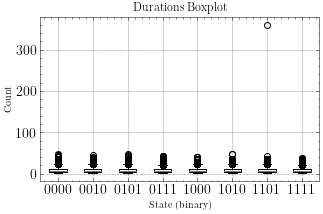

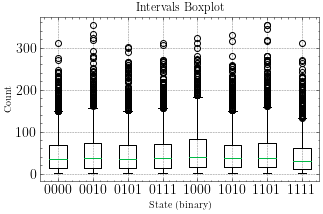

In [28]:
def plot_boxplot_from_dict(data_dict, title):
    # Convert dict keys to binary strings and sort them
    sorted_keys = sorted(data_dict.keys())
    labels = [format(key, '04b') for key in sorted_keys]
    
    # Prepare data for boxplot
    data = [data_dict[key] for key in sorted_keys]
    
    # Create boxplot
    plt.figure(figsize=(5, 3))
    plt.boxplot(data, labels=labels)
    plt.title(title)
    plt.xlabel('State (binary)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

plot_boxplot_from_dict(durations, 'Durations Boxplot')
plot_boxplot_from_dict(intervals, 'Intervals Boxplot')

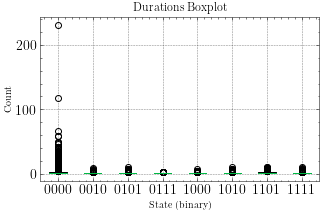

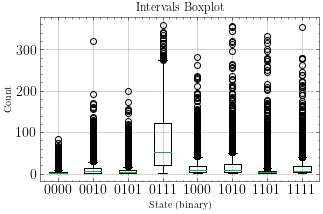

In [29]:
durations, intervals = analyze_state_durations_and_intervals(corrected_matrix_SB)
plot_boxplot_from_dict(durations, 'Durations Boxplot')
plot_boxplot_from_dict(intervals, 'Intervals Boxplot')

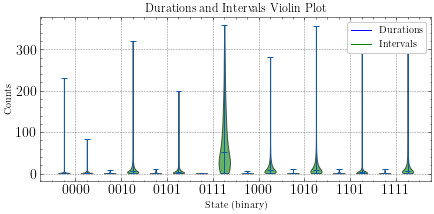

In [30]:
def plot_violin_from_dicts(durations_dict, intervals_dict, title):
    # Ensure the keys in both dictionaries are the same and sorted
    assert durations_dict.keys() == intervals_dict.keys()
    sorted_keys = sorted(durations_dict.keys())
    
    # Prepare data for violin plot
    data_for_plot = []
    for key in sorted_keys:
        # We will have two entries for each key: one for durations and one for intervals
        data_for_plot.append(durations_dict[key])  # Durations for this state
        data_for_plot.append(intervals_dict[key])  # Intervals for this state
    
    # Create the labels as binary strings of the keys
    labels = [format(key, '04b') for key in sorted_keys for _ in (0, 1)]
    
    # Create violin plot
    fig, ax = plt.subplots(figsize=(7, 3))
    violins = ax.violinplot(data_for_plot, showmeans=False, showmedians=True)
    
    # Customize the colors for each part of the violin
    for i in range(len(violins['bodies'])):
        color = 'blue' if i % 2 == 0 else 'green'
        violins['bodies'][i].set_facecolor(color)
        violins['bodies'][i].set_edgecolor('black')
        violins['bodies'][i].set_alpha(0.6)
    
    # Customize the x-ticks to display the binary labels correctly
    plt.xticks(np.arange(1.5, len(labels) + 1, 2), labels[::2])
    plt.title(title)
    plt.xlabel('State (binary)')
    plt.ylabel('Counts')
    plt.grid(True)
    
    # Adding custom legend
    plt.plot([], [], color='blue', label='Durations')
    plt.plot([], [], color='green', label='Intervals')
    plt.legend(loc='upper right')
    
    plt.show()

# Example usage with the same example dictionaries
plot_violin_from_dicts(durations, intervals, 'Durations and Intervals Violin Plot')

